In [2]:
%matplotlib inline


In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = pd.DataFrame(data)
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [62]:
df['date'] = pd.to_datetime(df['date'])
df.head()
counties = df['county'].value_counts()
states = df['state'].value_counts()
counties.head()

Washington    562
Unknown       539
Jefferson     423
Franklin      383
Jackson       343
Name: county, dtype: int64

In [63]:
exponential={}
for st in states.index:
    state = df.loc[df['state']==st]
    counties = state['county'].value_counts()
    exponential.update( {st : {}} )
    for cnt in counties.index:
        county = state.loc[(df['county'] == cnt)]
        yprev = 0
        exponential[st].update({cnt:{}})
        exponential[st][cnt].update( {'xval' : []})
        exponential[st][cnt].update({'delta' :[]})
#         exponential[st][cnt].update({'date' :[]})
        days=0
        for y,z in county.iterrows(): 
            ycur = z['cases']
            dif = ycur - yprev
            exponential[st][cnt]['delta'].append(dif)
            exponential[st][cnt]['xval'].append(days)
#             exponential[st][cnt]['date'].append(z['date'])
            days=days+1
            yprev = ycur
        
    

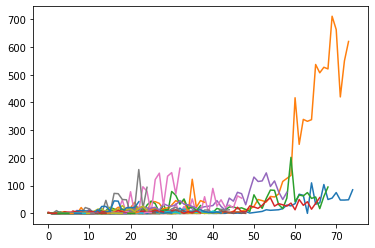

In [64]:
test =exponential['California']
for x in test:
     if len(test[x]['delta']) >2:
            plt.plot(test[x]['xval'],test[x]['delta'])
plt.show()

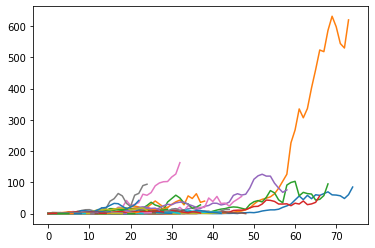

In [65]:

for cnt in test:
#     print(f'processing county {cnt}.')
#     print(f'X Val:{len(test[cnt]["xval"])} ')
    test[cnt].update({'delta_cln':[0]})
    if len(test[cnt]['delta']) > 2:
        for x in np.arange(1,len(test[cnt]['delta'])-1,1):
            test[cnt]['delta_cln'].append((test[cnt]['delta'][x-1]+test[cnt]['delta'][x]+test[cnt]['delta'][x+1])/3)
        test[cnt]['delta_cln'].append(test[cnt]['delta'][x+1])
for x in test:
     if len(test[x]['delta']) >2:
            plt.plot(test[x]['xval'],test[x]['delta_cln'])
plt.show()

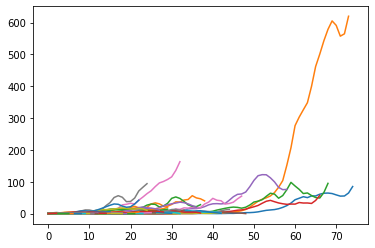

In [66]:
for cnt in test:
    test[cnt].update({'delta_cln2':[0]})
    if len(test[cnt]['delta']) > 2:
        for x in np.arange(1,len(test[cnt]['delta_cln'])-1,1):
            test[cnt]['delta_cln2'].append((test[cnt]['delta_cln'][x-1]+test[cnt]['delta_cln'][x]+test[cnt]['delta_cln'][x+1])/3)
        test[cnt]['delta_cln2'].append(test[cnt]['delta_cln'][x+1])
for x in test:
     if len(test[x]['delta']) >2:
            plt.plot(test[x]['xval'],test[x]['delta_cln2'])
plt.show()

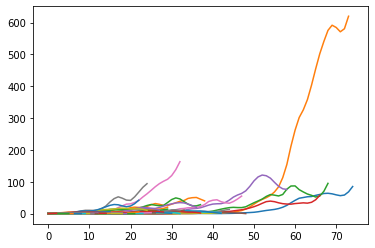

In [67]:
for cnt in test:
    test[cnt].update({'delta_cln3':[0]})
    if len(test[cnt]['delta']) > 2:
        for x in np.arange(1,len(test[cnt]['delta_cln2'])-1,1):
            test[cnt]['delta_cln3'].append((test[cnt]['delta_cln2'][x-1]+test[cnt]['delta_cln2'][x]+test[cnt]['delta_cln2'][x+1])/3)
        test[cnt]['delta_cln3'].append(test[cnt]['delta_cln'][x+1])
for x in test:
     if len(test[x]['delta']) >2:
            plt.plot(test[x]['xval'],test[x]['delta_cln3'])
plt.show()

Orange County


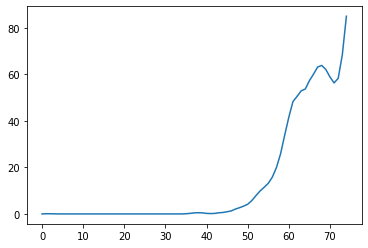

Los Angeles County


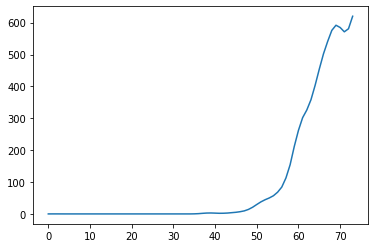

Santa Clara County


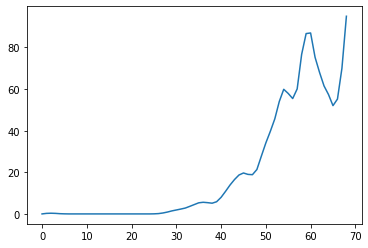

San Francisco County


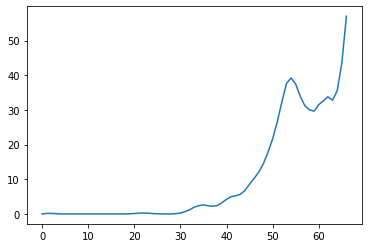

San Diego County


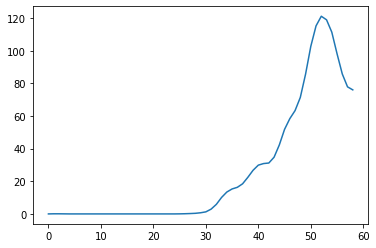

Humboldt County


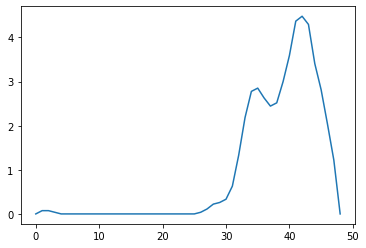

Sacramento County


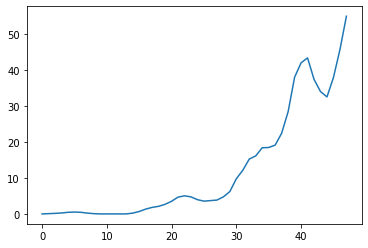

Solano County


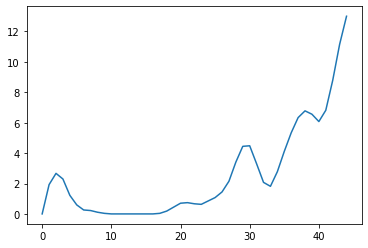

Napa County


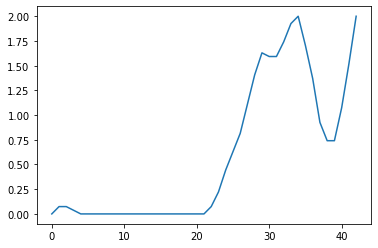

Sonoma County


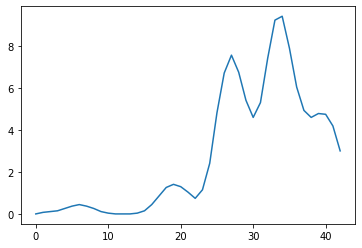

Marin County


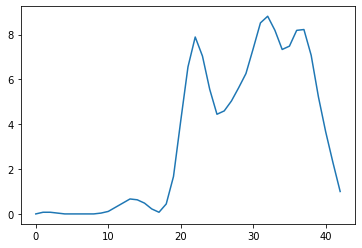

Alameda County


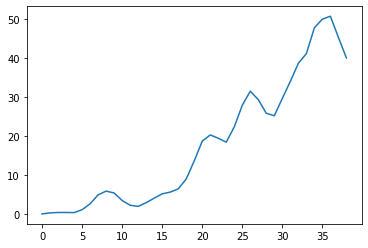

San Mateo County


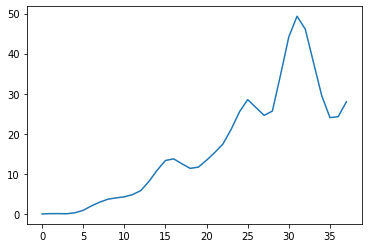

Placer County


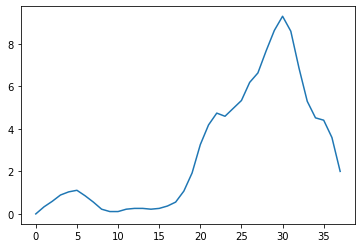

Contra Costa County


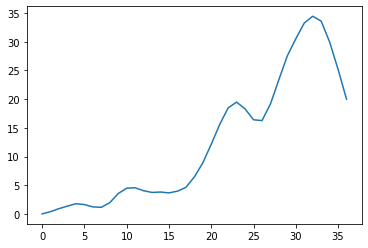

Yolo County


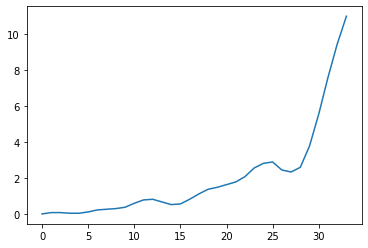

Riverside County


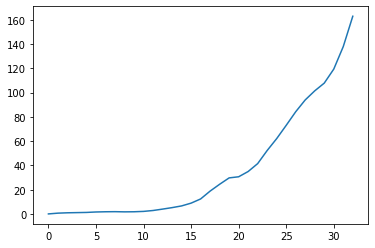

Fresno County


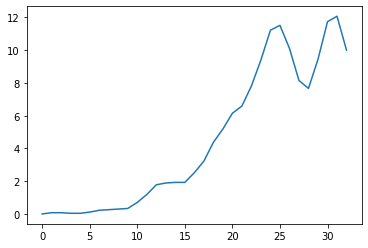

Madera County


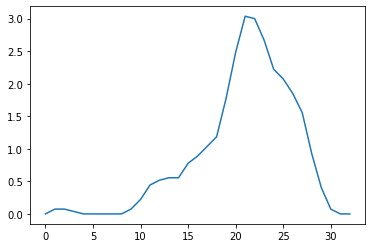

Santa Cruz County


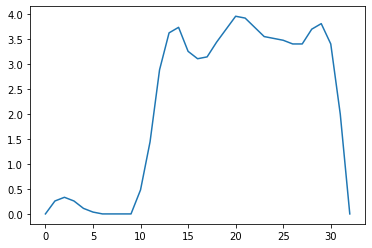

Shasta County


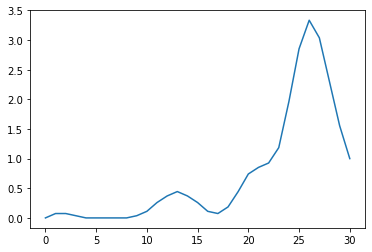

Ventura County


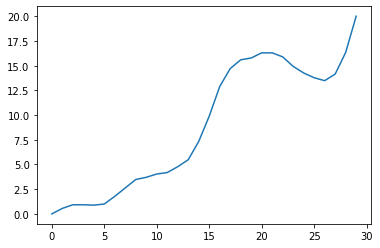

San Joaquin County


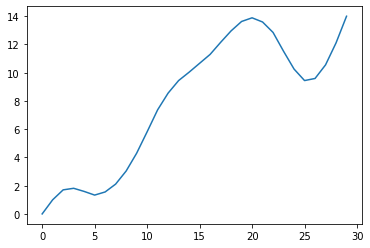

Stanislaus County


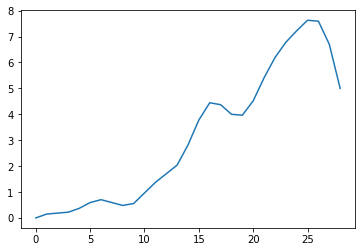

Tulare County


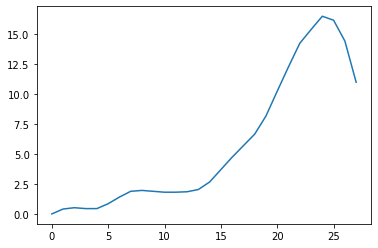

San Benito County


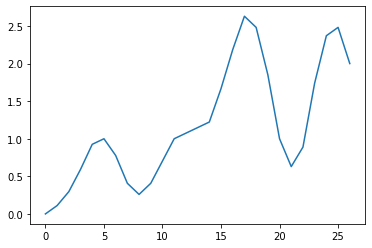

San Luis Obispo County


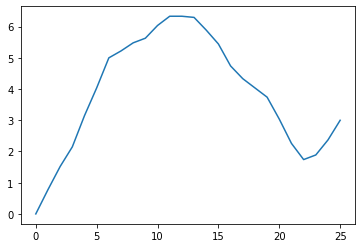

San Bernardino County


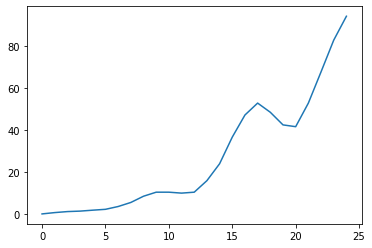

Santa Barbara County


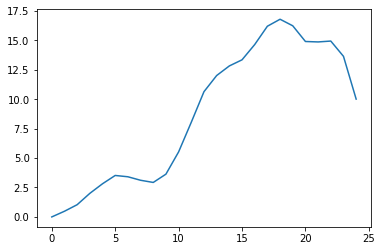

Nevada County


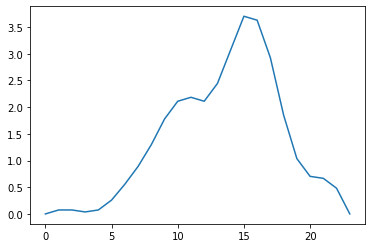

Kern County


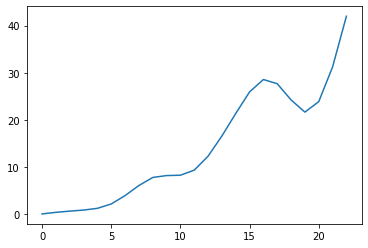

Monterey County


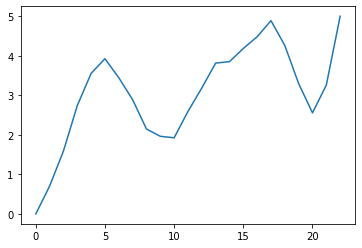

Mendocino County


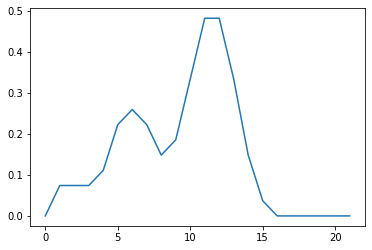

Imperial County


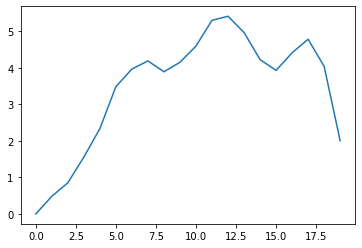

Amador County


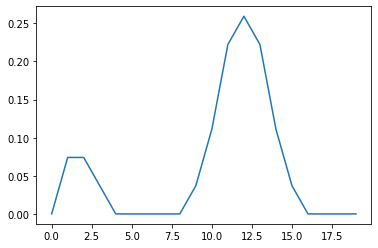

Butte County


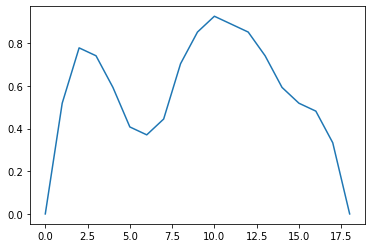

El Dorado County


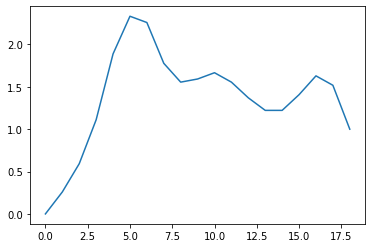

Yuba County


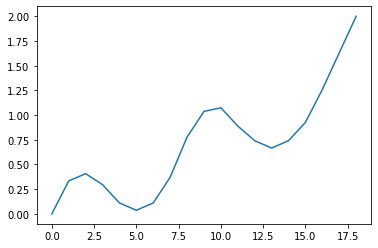

Siskiyou County


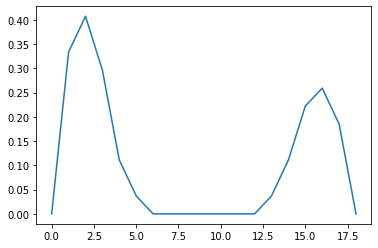

Calaveras County


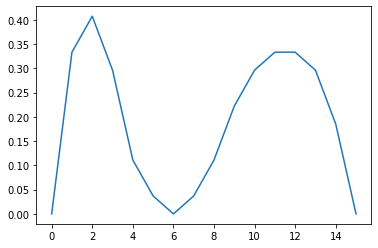

Merced County


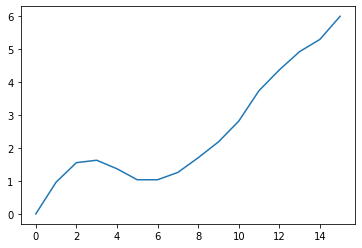

Mono County


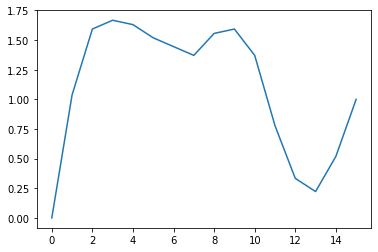

Inyo County


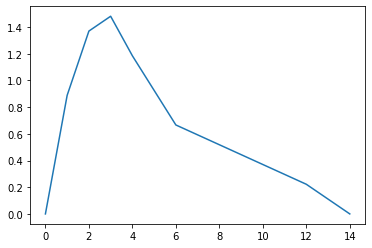

Sutter County


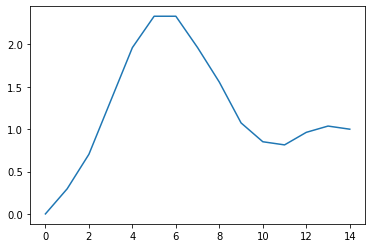

Kings County


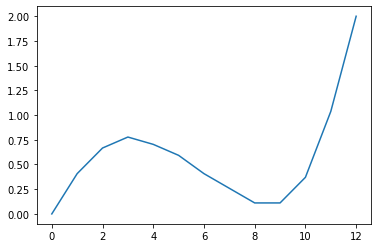

Colusa County


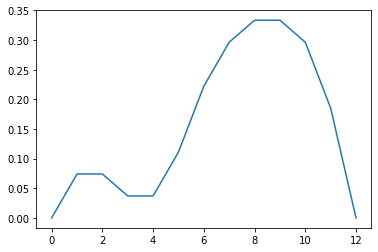

Glenn County


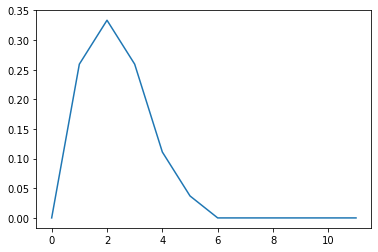

Unknown County


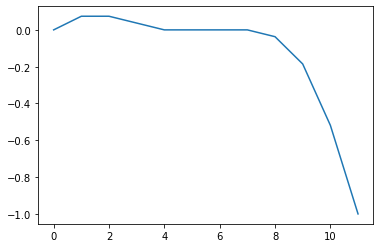

Tuolumne County


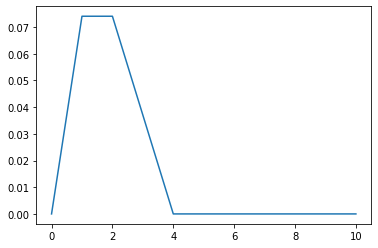

Alpine County


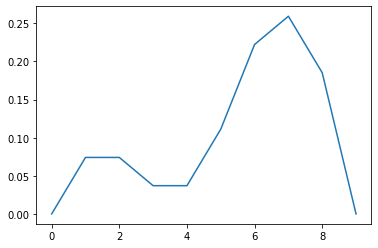

Plumas County


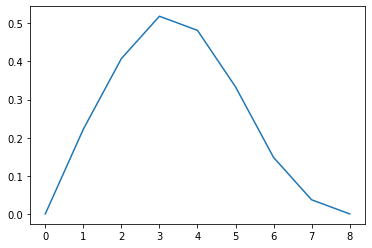

Del Norte County


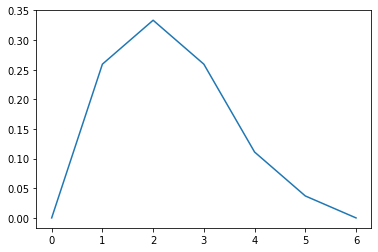

Tehama County


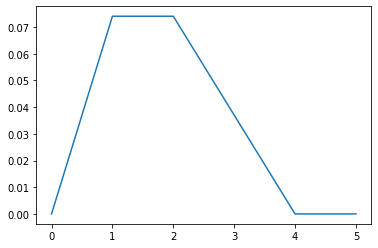

Lake County


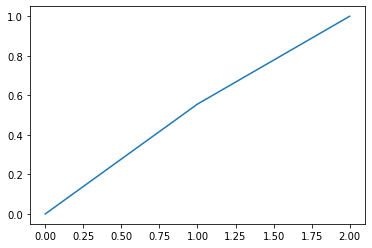

In [68]:
import keyboard
import time
for x in test:
    print(f'{x} County')
    plt.plot(test[x]['xval'],test[x]['delta_cln3'])
    plt.show()
#     time.sleep(5)
